In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

In [308]:
with open('./greg5_streams.json','r') as fp:
    dd = json.load(fp)

In [6]:
dd.keys()

dict_keys(['temp', 'resting', 'grade_smooth', 'cadence', 'distance', 'heartrate', 'altitude', 'grade_adjusted_distance', 'time'])

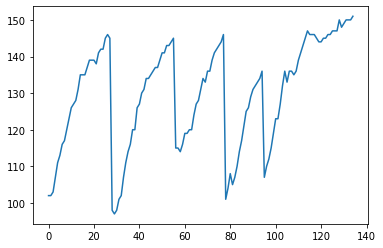

In [309]:
plt.plot(dd['heartrate']);

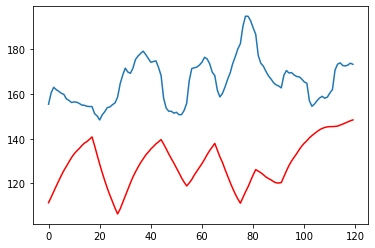

In [310]:
dx = np.diff(dd['distance'],1)
tx = np.diff(dd['timer_time'],1)
hhx = dd['heartrate']

vv = [x for x in zip(dx,tx,hhx[0:]) if x[1] > 0 ]
vv = np.array(vv)

ss = 10
hx = np.convolve(vv.T[2], np.ones(ss),'valid')/ss
vs = 3.6*np.convolve(vv.T[0]/vv.T[1], np.ones(ss)/ss, 'valid')

plt.plot(hx,'r')
plt.plot(8*vs + 40)

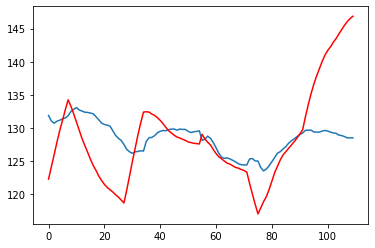

In [311]:
ss = 20
hx = np.convolve(vv.T[2], np.ones(ss),'valid')/ss
vs = 3.6*np.convolve(vv.T[0]/vv.T[1], np.ones(ss)/ss, 'valid')

lr = scipy.stats.linregress( vs[:], hx[:])
plt.plot(lr.slope*vs + lr.intercept);
#plt.plot(5*vs + 77)
plt.plot(hx,'r');

In [312]:
lr

LinregressResult(slope=-2.7013007180956916, intercept=171.0318864133627, rvalue=-0.33932899364695407, pvalue=0.00028731992495947936, stderr=0.7205702814387007, intercept_stderr=11.352652325441467)

In [272]:
lr

LinregressResult(slope=8.267016864078078, intercept=36.79079199274382, rvalue=0.5463135344744431, pvalue=2.766103921970319e-25, stderr=0.7257443011777307, intercept_stderr=8.943480167440034)

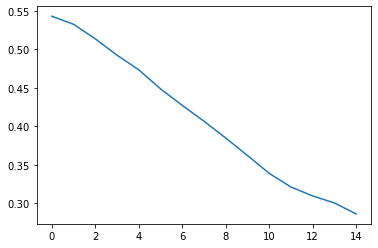

In [271]:
regs = [ scipy.stats.linregress( vs[k:], hx[k:]) for k in range(1,30,2)]
    
plt.plot([x.rvalue for x in regs]);

In [154]:
len(vs)

324

In [215]:
len(vvx), len(hx)

(279, 280)

In [224]:
lr.rvalue, lr

(0.6707029060167149,
 LinregressResult(slope=2.679487986266317, intercept=106.26659551439823, rvalue=0.6707029060167149, pvalue=4.0195205804208265e-39, stderr=0.17491386681888538, intercept_stderr=2.3293750419191306))

In [3]:
df = pd.read_csv("./Resting Heart Rate_2022.csv")

In [5]:
df2 = pd.read_csv("./Sleep_2022.csv")

In [63]:
df2

,Unnamed: 0,Sleep
0,21 Dec,9:28 hrs
1,28 Dec,9:10 hrs
2,4 Jan,9:40 hrs
3,11 Jan,9:57 hrs
4,18 Jan,8:57 hrs
5,25 Jan,10:08 hrs
6,1 Feb,9:12 hrs
7,8 Feb,8:49 hrs
8,15 Feb,9:10 hrs
9,22 Feb,9:28 hrs


In [30]:
df3 = pd.read_csv("./Intensity Minutes_2022.csv",skiprows=1)
df3["Actual"].values


array([432, 469, 667, 557, 518, 462, 575, 550, 521, 670, 453, 437, 606,
       387, 379, 435, 481, 476, 524, 515, 380, 447, 595, 596, 486, 489,
       497, 642, 193, 405, 484, 400, 275, 319, 377, 351, 374, 377, 298,
       332, 417, 469, 317, 540, 438, 621, 459, 399, 424, 377, 181,  82])

In [15]:
def t2m(x):
    v = np.array([60,1])
    return v @ [int(_) for _ in x.split()[0].split(':')]


H = df["Resting Heart Rate"].values
S = [ t2m(x) for x in df2["Sleep"].values]

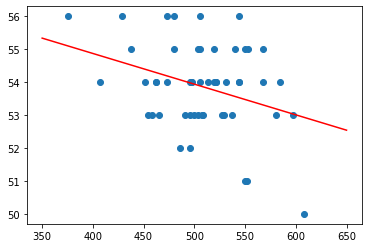

In [50]:
plt.scatter(S,H);
X = np.array([350,650])
plt.plot(X,pp.slope*X + pp.intercept,"r");

In [77]:
import scipy
import scipy.stats
pp = scipy.stats.linregress(S,H)

NameError: name 'S' is not defined

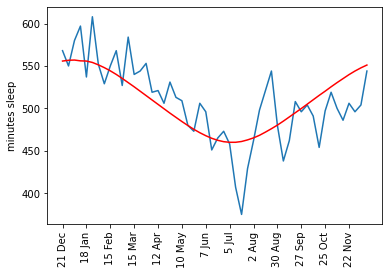

In [145]:
S = [t2m(_) for _ in df2["Sleep"].values]

plt.plot(S)
plt.plot(uu.slope * dd + uu.intercept,"r")

         
ll = list(enumerate( df2.iloc[:,0].values) )[0::4]
x, labels = list(zip(*ll))

plt.xticks(x, labels, rotation='vertical')
plt.ylabel("minutes sleep");

In [56]:
sum(H)/len(H)

53.86538461538461

In [141]:
dd = np.roll(day_length[::7],4)[:-1]

uu = scipy.stats.linregress(dd, S)

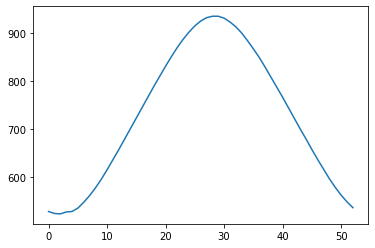

In [131]:
plt.plot(np.roll(day_length[::7],4));

In [125]:
import requests
import re

pp = re.compile(">(\d+:\d+)")

In [101]:
months = '''January, February, March, April, May, June, 
July, August, September, October, November,  December'''
months = [ x.strip().lower() for x in months.split(",")]


tt = []
for x in months:
    url = "https://www.sunrise-and-sunset.com/en/sun/france/grenoble/2022/" + x
    print(url)
    r = requests.get(url=url)
    tt.append(r.text)

https://www.sunrise-and-sunset.com/en/sun/france/grenoble/2022/january
https://www.sunrise-and-sunset.com/en/sun/france/grenoble/2022/february
https://www.sunrise-and-sunset.com/en/sun/france/grenoble/2022/march
https://www.sunrise-and-sunset.com/en/sun/france/grenoble/2022/april
https://www.sunrise-and-sunset.com/en/sun/france/grenoble/2022/may
https://www.sunrise-and-sunset.com/en/sun/france/grenoble/2022/june
https://www.sunrise-and-sunset.com/en/sun/france/grenoble/2022/july
https://www.sunrise-and-sunset.com/en/sun/france/grenoble/2022/august
https://www.sunrise-and-sunset.com/en/sun/france/grenoble/2022/september
https://www.sunrise-and-sunset.com/en/sun/france/grenoble/2022/october
https://www.sunrise-and-sunset.com/en/sun/france/grenoble/2022/november
https://www.sunrise-and-sunset.com/en/sun/france/grenoble/2022/december


In [110]:
data = [ pp.findall(x)[2::3] for x in tt]

In [120]:
from itertools import chain
day_length = list(chain.from_iterable(data))


In [113]:
def dtm(x):
    v = np.array([60,1])
    return v @ [int(_) for _ in x.split(':')]

In [121]:
day_length = np.array([dtm(x) for x in day_length])

In [122]:
day_length

array([528, 528, 529, 530, 532, 533, 534, 535, 537, 538, 540, 541, 543,
       545, 547, 549, 550, 552, 554, 556, 559, 561, 563, 565, 568, 570,
       572, 575, 577, 580, 582, 585, 587, 590, 593, 595, 598, 601, 604,
       607, 609, 612, 615, 618, 621, 624, 627, 630, 633, 636, 639, 642,
       645, 648, 651, 654, 657, 660, 663, 666, 670, 673, 676, 679, 682,
       685, 688, 692, 695, 698, 701, 704, 707, 711, 714, 717, 720, 723,
       726, 730, 733, 736, 739, 742, 745, 749, 752, 755, 758, 761, 764,
       767, 770, 774, 777, 780, 783, 786, 789, 792, 795, 798, 801, 804,
       807, 810, 813, 816, 819, 822, 825, 828, 831, 834, 837, 840, 843,
       845, 848, 851, 854, 856, 859, 862, 864, 867, 870, 872, 875, 877,
       880, 882, 885, 887, 889, 891, 894, 896, 898, 900, 902, 904, 906,
       908, 910, 912, 913, 915, 917, 918, 920, 921, 922, 924, 925, 926,
       927, 928, 929, 930, 931, 932, 932, 933, 934, 934, 935, 935, 935,
       935, 935, 935, 935, 935, 935, 935, 934, 934, 934, 933, 93

In [95]:
pp = re.compile(">(\d+:\d+)")

In [ ]:
pp = re.compile(">(\d+:\d+)")

In [96]:
pp.findall(r.text)

['08:16',
 '17:04',
 '08:48',
 '08:16',
 '17:05',
 '08:48',
 '08:16',
 '17:06',
 '08:49',
 '08:16',
 '17:07',
 '08:50',
 '08:16',
 '17:08',
 '08:52',
 '08:16',
 '17:09',
 '08:53',
 '08:16',
 '17:10',
 '08:54',
 '08:15',
 '17:11',
 '08:55',
 '08:15',
 '17:13',
 '08:57',
 '08:15',
 '17:14',
 '08:58',
 '08:15',
 '17:15',
 '09:00',
 '08:14',
 '17:16',
 '09:01',
 '08:14',
 '17:17',
 '09:03',
 '08:13',
 '17:19',
 '09:05',
 '08:13',
 '17:20',
 '09:07',
 '08:12',
 '17:21',
 '09:09',
 '08:11',
 '17:22',
 '09:10',
 '08:11',
 '17:24',
 '09:12',
 '08:10',
 '17:25',
 '09:14',
 '08:09',
 '17:26',
 '09:16',
 '08:09',
 '17:28',
 '09:19',
 '08:08',
 '17:29',
 '09:21',
 '08:07',
 '17:30',
 '09:23',
 '08:06',
 '17:32',
 '09:25',
 '08:05',
 '17:33',
 '09:28',
 '08:04',
 '17:35',
 '09:30',
 '08:03',
 '17:36',
 '09:32',
 '08:02',
 '17:37',
 '09:35',
 '08:01',
 '17:39',
 '09:37',
 '08:00',
 '17:40',
 '09:40',
 '07:59',
 '17:42',
 '09:42']